# Computer Science Refershments Project 1

## Description

TODO

## Solution: 
_Divide and Conquer !_
Divide the problem when:
- change of segment in the theoretical trajectory
- intersection of the theoretical and experimental trajectories
- reach a _vertex_ in the experimental trajectory

How to calculate the error:
__The sum of the areas of the "Trapezium" formed by two points on the theoretical trajectory and two points of the experimental trajectory__
o When two points from the experimental and theoretical trajectories are equals, the area is a triangle. 

In [1]:
#imports

import numpy as np
import numpy.linalg as lin

In [2]:
def trajectoryError(coordTh,coordExp):
    """
    arg1 coordTh : a list of tuples (x,y). The path which should be followed.
    arg2 coordExp: a list of tuples (x,y). The points received from the "indoors-gps"
    return: error, the total area difference betweeen the theoretical trajectory and the experimental one divided by the distance.
    """
    ## assume the gps knows the exact start and end of the theoretical path:
    #if coordTh[0] != coordExp[0]:
    #    coordExp.insert(0, coordTh[0])
    #if coordTh[-1] != coordExp[-1]:
    #    coordExp.append(coordTh[-1])

    # initialize values:
    area = 0 # the total area between the theoretical and experimental paths
    distance = path_length(coordTh) # total theoretical path length
    j = 0 # iterator over the experimental path
    i = 0 # iterator over the theoretical path
    
    # start iterations:
    while (i+1 < len(coordTh) and j+1 < len(coordExp)):     
        # we work on a subsegment [coordTh[i], coordTh[i+1]] 
        
        print()
        print("coordTh[i] -> ", coordTh[i])
        print("coordTh[i+1] -> ", coordTh[i+1])
        print("coordExp[j] -> ", coordExp[j])
        print("coordExp[j+1] -> ", coordExp[j+1])
        
        # search for an intersection:
        intersectPoint = intersection(coordTh[i], coordTh[i+1], coordExp[j], coordExp[j+1]) 
        # compute orthogonal projections:
        ortproj1 =  ortogonalProjection(coordTh[i], coordTh[i+1], coordExp[j])
        ortproj2 =  ortogonalProjection(coordTh[i], coordTh[i+1], coordExp[j+1])
                
        if intersectPoint:
            
            print("intersectPoint exists")
            
            if intersectPoint == coordTh[i+1] == coordExp[j]:
                # we're outside of the subsegment
                i += 1 # advance along the theoretical path 
                
                print("advance along the theoretical path")
                
            else:
                # Before the intersection:
                # the points form the right triangle -> coordExp[j], ortproj(coordExp[j]), intersection
                base = seg_length(ortproj1, intersectPoint)
                height =  seg_length(coordExp[j], ortproj1)
                area += areaRightTriangle(base, height)
                print("+ ",areaRightTriangle(base, height))
                
                # After the intersection:
                # the points form the right triangle -> intersectPoint, coordExp[j+1], ortproj(coordExp[j+1])
                base = seg_length(intersectPoint, ortproj2)
                height =  seg_length(coordExp[j+1], ortproj2)
                area += areaRightTriangle(base, height)
                print("+ ",areaRightTriangle(base, height))
                
                j += 1 # advance along the experimental path 
                
                print("advance along the experimental path")
        
        elif pointBelongsToSegment(coordTh[i], coordTh[i+1], ortproj1)\
        and pointBelongsToSegment(coordTh[i], coordTh[i+1], ortproj1):     
            
            print("ortproj1 and ortproj2 belong to segment")
            
            area += computeArea(ortproj1, ortproj2, coordExp[j], coordExp[j+1])
            print("+ ",computeArea(ortproj1, ortproj2, coordExp[j], coordExp[j+1]))
            j += 1 # advance along the experimental path  
            
            print("advance along the experimental path")
        
        else:
            # we're outside of the subsegment
            i += 1 # advance along the theoretical path
            
            print("advance along the theoretical path")
        
        ## TODO check for backtracking:
        
        # a) if ort1 or ort2 in in segment [ coordTh[i] , prevOrt1 ] or [ coordTh[i] , prevOrt2 ]
        
        # b) identify the area to remove 
        
    print("total area= ", area)
    print("distance= ", distance)
                
    return area / distance


def seg_length(x_1,x_2):
    """
    arg1 x_1 : A tuple, the coordinates of the first point of the segment
    arg2 x_2 : A tuple, the coordinates of the second point of the segment
    return : A float, the length of the segment made up by x_1 and x_2
    """
    return(np.sqrt((x_1[0]-x_2[0])**2 + (x_1[1]-x_2[1])**2))


def path_length(path):
    """
    arg1 path : A table of tuples, each tuple representing the coordinates of a point of the path.
    return : leng. A float, 
    """
    assert len(path) > 1
    leng = 0
    for i in range(len(path)-1):
        leng += seg_length(path[i],path[i+1])
    return(leng)


def intersection(x_1, x_2, y_1, y_2):
    """
    arg1,2 x_i: A tuple, the coordinates of a point on the theoretical trajectory
    arg3,4 y_i: A tuple, the coordinates of a point on the experimental trajectory
    return: intersect. A tuple, the coordinates of the intersection or null.
    Remark : if the intersection is not in the two segments, returns None.
    """

    # First case : the two lines are vertical
    if (x_1[0] == x_2[0] and y_1[0] == y_2[0]) :
        intersect = None
    
    # Second case : only the first line is vertical
    elif x_1[0] == x_2[0] :
        a = (y_1[1]-y_2[1])/(y_1[0]-y_2[0])
        b = y_2[1] - a * y_2[0]
        intersect = (x_1[0],a*x_1[0] + b)
    
    # Third case : only the second line is vertical
    elif y_1[0]  == y_2[0] :
        a = (x_1[1]-x_2[1])/(x_1[0]-x_2[0])
        b = x_2[1] - a * x_2[0]
        intersect = (y_1[0],a*y_1[0] + b)
    
    # Last case : general case
    else :
        a_x = (x_1[1] - x_2[1])/(x_1[0] - x_2[0])
        b_x = x_1[1] - a_x * x_1[0]
        a_y = (y_1[1] - y_2[1])/(y_1[0] - y_2[0])
        b_y = y_1[1] - a_y * y_1[0]
        
        if a_x == a_y :
            # Case where the lines are parallel
            intersect = None
        
        else :
            #The equations are
            #y = a_x*x + b_x
            #y = a_y*x + b_y
            # The solution is the inverted matrix
            intersect = ( (b_y-b_x)/(a_x-a_y),\
                          (b_y * a_x - b_x * a_y)/(a_x - a_y) )
    # If a point is found, check if it belongs to the segments and not only the lines (x_1[0]<intersect[0]<x_2[0] or...)
    if intersect:
        if not pointBelongsToSegment(x_1, x_2, intersect) and not pointBelongsToSegment(y_1, y_2, intersect):
        #if not ( (intersect[0] >= min(x_1[0],x_2[0])) and (intersect[0] <= max(x_1[0],x_2[0]))\
        #        and (intersect[1] >= min(x_1[1],x_2[1])) and (intersect[1] <= max(x_1[1],x_2[1]))\
        #        and (intersect[0] >= min(y_1[0],y_2[0])) and (intersect[0] <= max(y_1[0],y_2[0]))\
        #        and (intersect[1] >= min(y_1[1],y_2[1])) and (intersect[1] <= max(y_1[1],y_2[1]))): # Checked if it is in the y-segment 
            intersect = None
    
    return intersect


def ortogonalProjection(x_1, x_2, y):
    """
    Computes the orthogonal projection of y on the segment made up of the points x_1 and x_2.
    arg1,2 x_i: A tuple, the coordinates of a point on the theoretical trajectory
    arg3 y: A tuple, the coordinates of a point on the experimental trajectory
    return: newPoint. A tuple, the coordinates of the orthogonal projection on y on the segment [x_1,x_2]
    """
    
    # By removing the idea that ortogonalProjection() return "None" if the point does not belong to the segment.
    # None of the tests return errors!
    
    # newPoint = None
    if pointBelongsToSegment(x_1, x_2, y): # y already belongs to the segemnt [x_1, x_2]
        newPoint = y
    
    elif x_1[0] == x_2[0] :
        # First case : the line containing x_1 and x_2 is vertical
        # Be careful ! If the ordinate is not in the segment then we have to change it.
        #if (x_1[1] <= y[1] and y[1] <= x_2[1]) :
        newPoint = (x_1[0],y[1])
        #else :
        #    newPoint = None
    
    else :
    # Second case : the line containing x_1 and x_2 is not vertical
        a = (x_2[1]-x_1[1])/(x_2[0]-x_1[0])
        b = x_1[1] - a * x_1[0]
        # Now we know the line containing x_1 and x_2 has the equation y = a * x + b
        # So a normal vector to this line is (a,-1)
        # This vector is directing the normal line passing by the point y and its equation is - x - a * y + c = 0 :
        # let's find c!
        c = y[0] + a*y[1]
        # Now the intersection point is the point (x,y) which verifies :
        # a*x - y = -b
        # -x - a*y = -c
        mat = np.array([[a,-1],[-1,-a]])
        point = np.dot(lin.inv(mat), np.array([-b,-c]))
        newPoint = (point[0],point[1])
    
    #if (newPoint and (not pointBelongsToSegment(x_1,x_2,newPoint))) :
    #    newPoint = None
        
    return newPoint
                       
def computeArea(x_1, x_2, y_1, y_2):               
    """ 
    arg1,2 x_i: A tuple, the coordinates of a point on the theoretical trajectory
    arg3,4 y_i: A tuple, the coordinates of a point on the experimental trajectory
    return: area. An int, the area of the figure formed by the 4 coordinates
    """
    area = 0
    
    # first triangle:
    base = seg_length(x_1, y_2)
    height = seg_length(x_2, ortogonalProjection(x_1, y_2, x_2))
    area += areaRightTriangle(base, height)
    
    # second triangle:
    base = seg_length(x_1, y_2)
    height =  seg_length(y_1, ortogonalProjection(x_1, y_2, y_1))
    area += areaRightTriangle(base, height)

    return area

def areaRightTriangle(base, height):
    """
    Computes the area of a right triangle.
    
    arg1: base. A numeral, the length of the basis of the triangle 
    arg2: height. A numeral, the length of the basis of the triangle
    return: the area of the rectangle
    """
    return np.abs((base * height) / 2)

def pointBelongsToSegment(x_1, x_2, y):
    """
    arg1,2 x_i: A tuple, the coordinates of a point on the theoretical trajectory
    arg3 y: A tuple, the coordinates of a point on the experimental trajectory
    return: A boolean, True if y belongs to the segment [x_1,x_2]. False otherwise.
    """
    #check that x_1, x_2 and y are aligned:
    crossproduct = (y[1] - x_1[1]) * (x_2[0] - x_1[0]) - (y[0] - x_1[0]) * (x_2[1] - x_1[1])
    if (isinstance(crossproduct, int) and abs(crossproduct) != 0) or (isinstance(crossproduct,float) and abs(crossproduct) > 0.0000000001):
        return False

    #check that y belongs to the segment:
    dotproduct = (y[0] - x_1[0])*(x_2[0] - x_1[0]) + (y[1] - x_1[1])*(x_2[1] - x_1[1])
    if dotproduct < 0:
        return False

    squaredSegmentLength = seg_length(x_1,x_2)**2
    if dotproduct > squaredSegmentLength:
        return False

    return True

In [3]:
import matplotlib.pyplot as plt
def displ(theo,expe):
    # theo is the theoretical path
    # expe is the one really performed
    plt.clf()
    plt.figure()
    plt.plot([theo[i][0] for i in range(len(theo))],[theo[i][1] for i in range(len(theo))],c='r',label = "theoretical")
    #plt.tit("theoretical")
    plt.plot([expe[i][0] for i in range(len(expe))],[expe[i][1] for i in range(len(expe))],c='g',label = "experimental")
    #plt.label("experimental")
    plt.title("Paths")
    plt.legend()
    plt.show()

<Figure size 432x288 with 0 Axes>

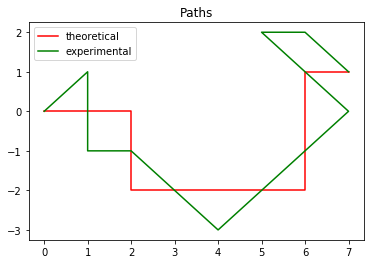


coordTh[i] ->  (0, 0)
coordTh[i+1] ->  (2, 0)
coordExp[j] ->  (0, 0)
coordExp[j+1] ->  (1, 1)
intersectPoint exists
+  0.0
+  0.5
advance along the experimental path

coordTh[i] ->  (0, 0)
coordTh[i+1] ->  (2, 0)
coordExp[j] ->  (1, 1)
coordExp[j+1] ->  (1, -1)
intersectPoint exists
+  0.0
+  0.0
advance along the experimental path

coordTh[i] ->  (0, 0)
coordTh[i+1] ->  (2, 0)
coordExp[j] ->  (1, -1)
coordExp[j+1] ->  (2, -1)
ortproj1 and ortproj2 belong to segment
+  1.0000000000000002
advance along the experimental path

coordTh[i] ->  (0, 0)
coordTh[i+1] ->  (2, 0)
coordExp[j] ->  (2, -1)
coordExp[j+1] ->  (4, -3)
intersectPoint exists
+  0.5
+  4.5
advance along the experimental path

coordTh[i] ->  (0, 0)
coordTh[i+1] ->  (2, 0)
coordExp[j] ->  (4, -3)
coordExp[j+1] ->  (7, 0)
advance along the theoretical path

coordTh[i] ->  (2, 0)
coordTh[i+1] ->  (2, -2)
coordExp[j] ->  (4, -3)
coordExp[j+1] ->  (7, 0)
advance along the theoretical path

coordTh[i] ->  (2, -2)
coordTh[i+1] -

0.875

In [4]:
theo = [(0,0),(2,0),(2,-2),(6,-2),(6,1),(7,1)]
expe = [(0,0),(1,1),(1,-1),(2,-1),(4,-3),(7,0),(5,2),(6,2),(7,1)]
displ(theo,expe)
trajectoryError(theo,expe)